## 메이븐 로스터: 커피숍 판매 및 수익 데이터
트렌드 공개: 커피숍 판매 데이터의 시간 분석, 거래 및 수익

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sep('|') : 데이터 구분 |

In [6]:
sales = pd.read_csv('/home/leejieun/workspace/kaggle-notebooks/datasets/agungpambudi/trends-product-coffee-shop-sales-revenue-dataset/coffee-shop-sales-revenue.csv',sep='|')

In [7]:
sales.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [8]:
sales.shape

(149116, 11)

In [9]:
sales.tail()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [11]:
sales.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


In [13]:
sales.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [14]:
sales.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [16]:
sales.duplicated().sum()

0

In [17]:
sales['transaction_date'] = pd.to_datetime(sales['transaction_date'])
sales['transaction_time'] = pd.to_datetime(sales['transaction_time'])
sales.info()

/tmp/ipykernel_1052810/2526122367.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['transaction_time'] = pd.to_datetime(sales['transaction_time'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  datetime64[ns]
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.5+ MB


In [18]:
sales['transaction_day'] = sales['transaction_date'].dt.day
sales['transaction_month'] = sales['transaction_date'].dt.month
sales['transaction_year'] = sales['transaction_date'].dt.year
sales['transaction_hour'] = sales['transaction_time'].dt.hour

In [19]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   transaction_id     149116 non-null  int64         
 1   transaction_date   149116 non-null  datetime64[ns]
 2   transaction_time   149116 non-null  datetime64[ns]
 3   transaction_qty    149116 non-null  int64         
 4   store_id           149116 non-null  int64         
 5   store_location     149116 non-null  object        
 6   product_id         149116 non-null  int64         
 7   unit_price         149116 non-null  float64       
 8   product_category   149116 non-null  object        
 9   product_type       149116 non-null  object        
 10  product_detail     149116 non-null  object        
 11  transaction_day    149116 non-null  int32         
 12  transaction_month  149116 non-null  int32         
 13  transaction_year   149116 non-null  int32   

In [20]:
sales = sales.drop('transaction_time', axis=1)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   transaction_id     149116 non-null  int64         
 1   transaction_date   149116 non-null  datetime64[ns]
 2   transaction_qty    149116 non-null  int64         
 3   store_id           149116 non-null  int64         
 4   store_location     149116 non-null  object        
 5   product_id         149116 non-null  int64         
 6   unit_price         149116 non-null  float64       
 7   product_category   149116 non-null  object        
 8   product_type       149116 non-null  object        
 9   product_detail     149116 non-null  object        
 10  transaction_day    149116 non-null  int32         
 11  transaction_month  149116 non-null  int32         
 12  transaction_year   149116 non-null  int32         
 13  transaction_hour   149116 non-null  int32   

In [21]:
sales['total_revenue'] = sales['transaction_qty']*sales['unit_price']
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   transaction_id     149116 non-null  int64         
 1   transaction_date   149116 non-null  datetime64[ns]
 2   transaction_qty    149116 non-null  int64         
 3   store_id           149116 non-null  int64         
 4   store_location     149116 non-null  object        
 5   product_id         149116 non-null  int64         
 6   unit_price         149116 non-null  float64       
 7   product_category   149116 non-null  object        
 8   product_type       149116 non-null  object        
 9   product_detail     149116 non-null  object        
 10  transaction_day    149116 non-null  int32         
 11  transaction_month  149116 non-null  int32         
 12  transaction_year   149116 non-null  int32         
 13  transaction_hour   149116 non-null  int32   

In [22]:
type = sales['product_type'].value_counts()

In [25]:
type10 = type.head(10).sort_values(ascending=False)
type10

product_type
Brewed Chai tea          17183
Gourmet brewed coffee    16912
Barista Espresso         16403
Hot chocolate            11468
Brewed Black tea         11350
Brewed herbal tea        11245
Scone                    10173
Organic brewed coffee     8489
Drip coffee               8477
Premium brewed coffee     8135
Name: count, dtype: int64

/tmp/ipykernel_1052810/1849130114.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type10.index, y=type10, palette='rainbow')


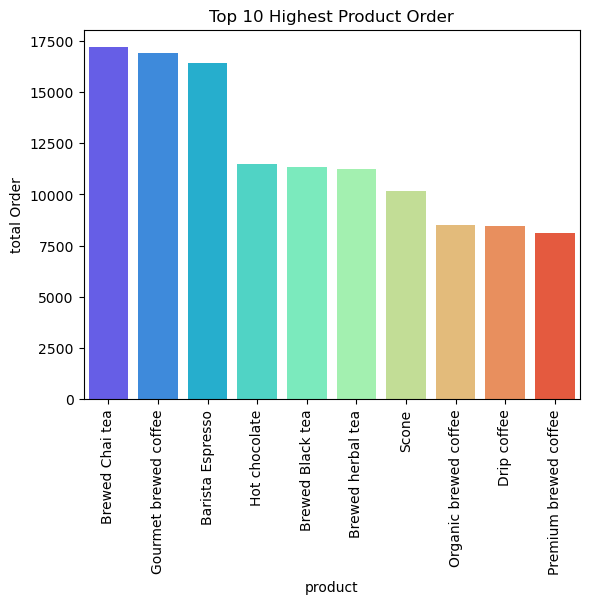

In [36]:
sns.barplot(x=type10.index, y=type10, palette='rainbow')
plt.title("Top 10 Highest Product Order")
plt.xlabel("product")
plt.ylabel('total Order')
plt.xticks(rotation=90)
plt.show()

In [39]:
category = sales['product_category'].value_counts()
cat_5 = category.head(5).sort_values(ascending=False) # ascending False: 내림차순 / True : 오름차순

In [38]:
cat_5

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Name: count, dtype: int64

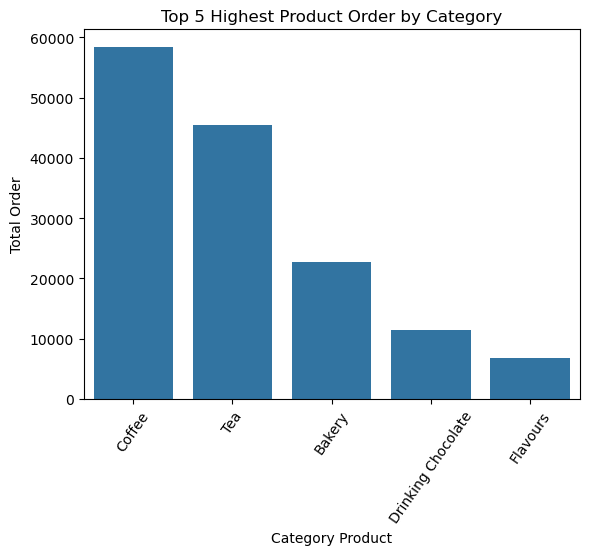

In [46]:
sns.barplot(x=cat_5.index, y=cat_5)
plt.title('Top 5 Highest Product Order by Category')
plt.xlabel('Category Product')
plt.ylabel('Total Order')
plt.xticks(rotation = 55)
plt.show()

In [42]:
cat_per_location = sales.groupby(by=['store_location', 'product_category'])['total_revenue'].sum().reset_index()
cat_per_location

,store_location,product_category,total_revenue
0,Astoria,Bakery,26599.75
1,Astoria,Branded,5457.00
2,Astoria,Coffee,89744.30
3,Astoria,Coffee beans,10219.20
4,Astoria,Drinking Chocolate,26335.25
5,Astoria,Flavours,1764.80
6,Astoria,Loose Tea,3194.00
7,Astoria,Packaged Chocolate,1089.71
8,Astoria,Tea,67839.90
9,Hell's Kitchen,Bakery,27386.95


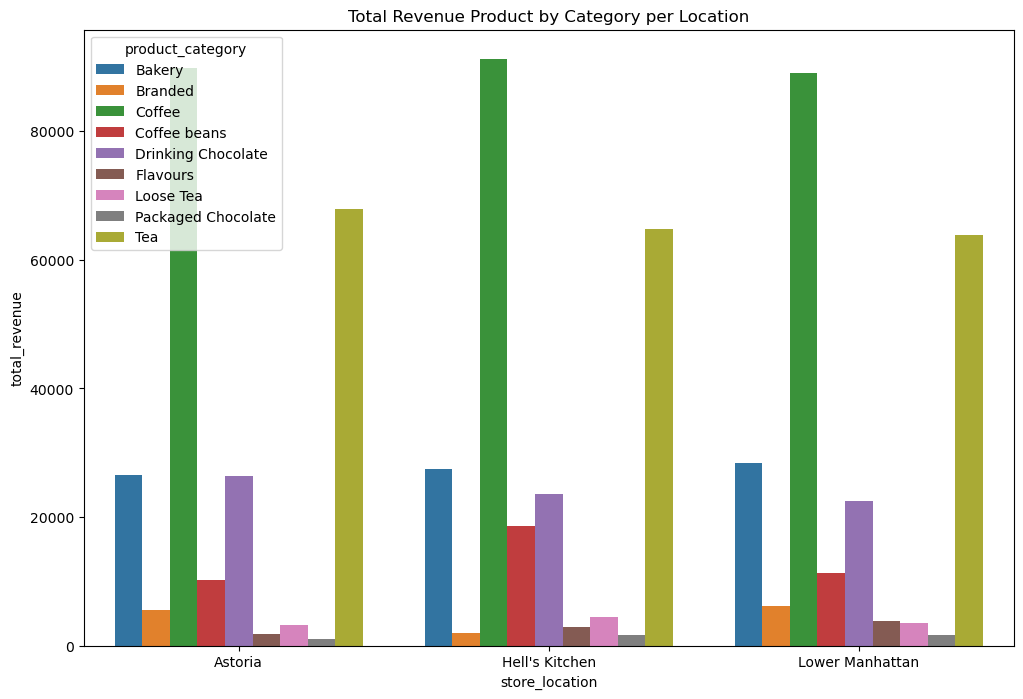

In [43]:
plt.figure(figsize=(12,8))
sns.barplot(x='store_location', y='total_revenue', data=cat_per_location, hue='product_category')
plt.title('Total Revenue Product by Category per Location')
plt.show()

In [47]:
sales_per_day = sales.groupby(['transaction_month','transaction_day'])['total_revenue'].sum().reset_index()
sales_per_day

,transaction_month,transaction_day,total_revenue
0,1,1,2508.20
1,1,2,2403.35
2,1,3,2565.00
3,1,4,2220.10
4,1,5,2418.85
...,...,...,...
176,6,26,5875.90
177,6,27,5975.65
178,6,28,4728.90
179,6,29,4450.75


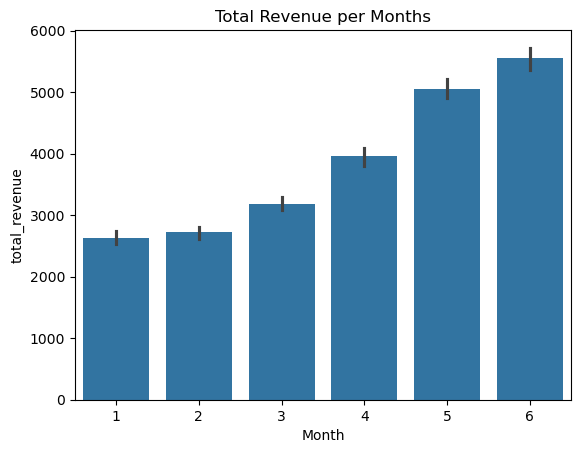

In [49]:
sns.barplot(x='transaction_month', y='total_revenue', data=sales_per_day)
plt.title('Total Revenue per Months')
plt.xlabel('Month')
plt.show()

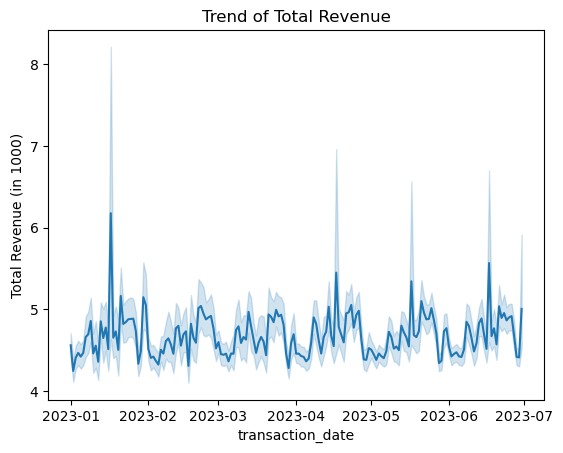

In [50]:
sns.lineplot(x=sales['transaction_date'], y=sales['total_revenue'], data=sales)
plt.title('Trend of Total Revenue')
plt.ylabel('Total Revenue (in 1000)')
plt.show()

In [51]:
sales_jan = sales[sales['transaction_month'] ==1]
sales_jan.head()

,transaction_id,transaction_date,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_day,transaction_month,transaction_year,transaction_hour,total_revenue
0,1,2023-01-01,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,1,1,2023,7,6.0
1,2,2023-01-01,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,1,2023,7,6.2
2,3,2023-01-01,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,1,1,2023,7,9.0
3,4,2023-01-01,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1,1,2023,7,2.0
4,5,2023-01-01,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,1,2023,7,6.2


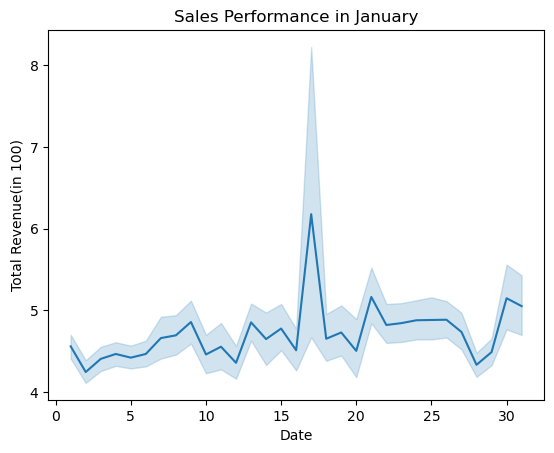

In [52]:
sns.lineplot(x=sales_jan['transaction_day'], y=sales_jan['total_revenue'], data=sales_jan)
plt.title('Sales Performance in January')
plt.xlabel('Date')
plt.ylabel('Total Revenue(in 100)')
plt.show()

In [54]:
jan_count = sales_jan.groupby('transaction_day').agg({'transaction_id' : 'count'}).reset_index()

/tmp/ipykernel_1052810/1804960816.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jan_count['transaction_day'], y=jan_count['transaction_id'], data=jan_count, palette='rainbow')


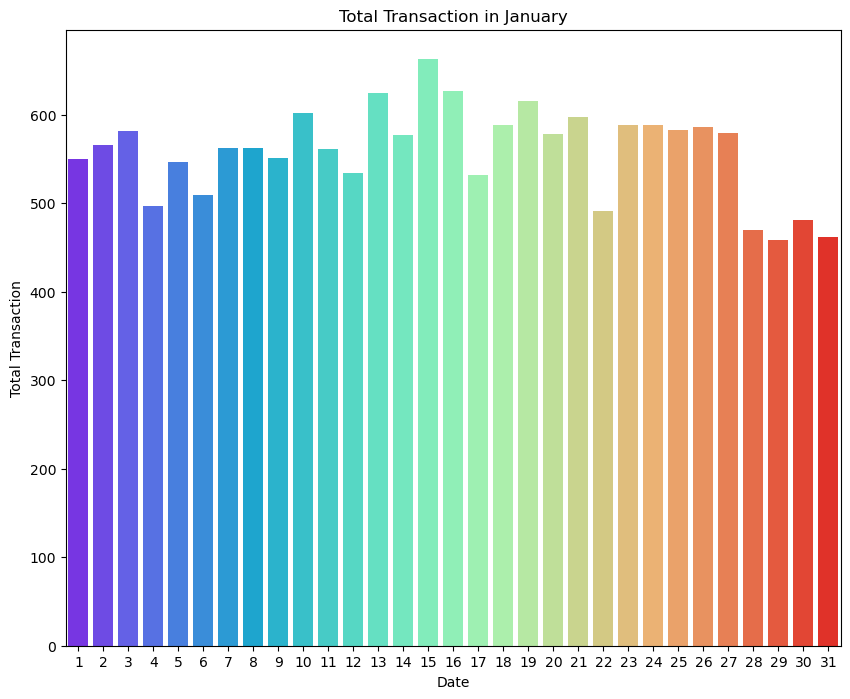

In [56]:
plt.figure(figsize=(10,8))
sns.barplot(x=jan_count['transaction_day'], y=jan_count['transaction_id'], data=jan_count, palette='rainbow')
plt.title("Total Transaction in January")
plt.xlabel("Date")
plt.ylabel("Total Transaction")
plt.show()